# Exercise 03 Regression II

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

## Part 1. Multiple linear regression

This part will build a multiple linear regression model using the [Diabetes Dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

All availble features will be used as independent variables in the multiple linear regression model.

### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data preparation

In [2]:
# load datasets
feature_df, target_df = datasets.load_diabetes(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    scaled = False # return raw values
)

In [3]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.5, # 50% training & 50% testing
    shuffle = False # split dataset without shuffling
)

In [4]:
# obtain basic information
print("The number of features:", len(feature_df.columns))
print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))

The number of features: 10
Size of training dataset: 221
Size of testing dataset: 221


### Training

In [5]:
# obtain the shape of X_train to see if it's a 2D array
X_train.shape

(221, 10)

In [6]:
# fit the multiple linear regression model
mlr = LinearRegression(fit_intercept = True)
mlr.fit(X_train, y_train)

LinearRegression()

In [7]:
# print the learned parameter values
parameter = pd.Series(
    data = mlr.coef_,
    index = feature_df.columns + '_coef'
)
parameter['intercept'] = mlr.intercept_
print(parameter)

age_coef      -0.103646
sex_coef     -27.311730
bmi_coef       5.513811
bp_coef        0.865715
s1_coef       -1.141010
s2_coef        0.604114
s3_coef        0.768768
s4_coef       10.839593
s5_coef       68.946417
s6_coef        0.568497
intercept   -339.871607
dtype: float64


In [8]:
# model performance on the training dataset
rmse_train = mean_squared_error(y_train, mlr.predict(X_train), squared = False)
r2_train = r2_score(y_train, mlr.predict(X_train))

print("RMSE train:", rmse_train)
print("R2 train:", r2_train)

RMSE train: 53.50926755120249
R2 train: 0.4914462740197183


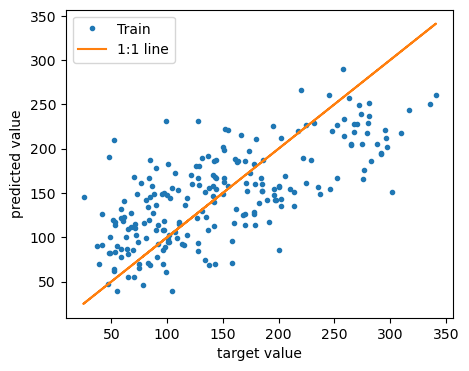

In [9]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_train, mlr.predict(X_train), '.', label = 'Train')
plt.plot(y_train, y_train, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

### Evaluation

In [10]:
# make predictions on testing dataset
y_pred = mlr.predict(X_test)

In [11]:
# model performance on the testing dataset
rmse_test = mean_squared_error(y_test, y_pred, squared = False)
r2_test = r2_score(y_test, y_pred)

print("RMSE test:", rmse_test)
print("R2 test:", r2_test)

RMSE test: 54.26162382705953
R2 test: 0.5248892716360296


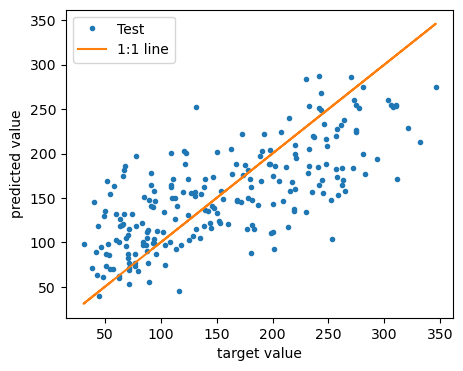

In [12]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.', label = 'Test')
plt.plot(y_test, y_test, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

## Part 2. Feature selection

Insteading of using all available features, we can perform feature selection before model training.

In this part, We will use the filter method to select 9 features among the 10 available features.
- Use `sklearn.feature_selection.SelectKBest` to implement the filter method
- Use `sklearn.feature_selection.r_regression` as the score function

### Import libraries

In [13]:
# import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression

### Data preparation

In [14]:
# load datasets
feature_df, target_df = datasets.load_diabetes(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    scaled = False # return raw values
)

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.5, # 50% training & 50% testing
    shuffle = False # split dataset without shuffling
)

### Feature selection

In [16]:
# Use r_regression
selector_r = SelectKBest(
    score_func = r_regression, # specify Pearson correlation coefficient as the score function
    k = 9 # select the 9 best features
)
selector_r.fit(X_train, y_train) # use the training dataset instead of the entire dataset

SelectKBest(k=9, score_func=<function r_regression at 0x0000026DE66B2840>)

In [17]:
# formalize the selection result as a DataFrame
result_r = pd.DataFrame(
    {
        'feature': feature_df.columns.values, # feature names
        'score': selector_r.scores_, # scores for each feature
        'selected': selector_r.get_support() # selected or not
    }
)
result_r

,feature,score,selected
0,age,0.148060,True
1,sex,0.030765,True
2,bmi,0.551716,True
3,bp,0.399320,True
4,s1,0.158296,True
5,s2,0.123103,True
6,s3,-0.370010,False
7,s4,0.391922,True
8,s5,0.561528,True
9,s6,0.399089,True


From the above results we can find that 's3' was not selected. This is because it has the lowest score (-0.37).

However, the scores here represent the Pearson correlation coefficient.

According to the definition of Pearson correlation coefficient, the closer the absolute value is to 1, the stronger the correlation.

Therefore, 's3' is not the worst feature among others. There is a negative, or inverse correlation between 's3' and the target variable. We can check this by creating a scatter plot.

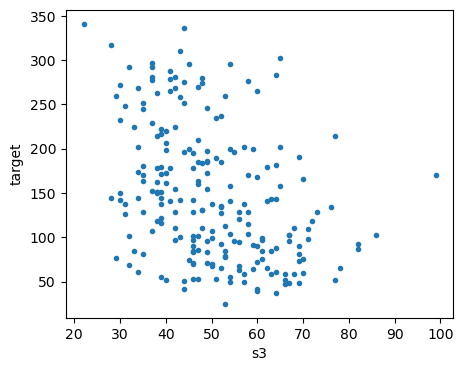

In [18]:
# scatter plot between s3 and target
plt.figure(figsize = [5, 4])
plt.plot(X_train[:,6], y_train, '.')
plt.xlabel('s3')
plt.ylabel('target')
plt.show()

From the above feature we can see, there is a negative correlation between 's3' and the target variable, although the correlation is not very strong.

When using `sklearn.feature_selection.SelectKBest`, the selector will select features according to the highest scores, not the highest absolute value of scores.

Therefore, when specfying `r_regression` as the score funtion for `SelectKBest`, the selector will rank features with negative correlation coefficients lower, which is not correct.

When there are negative correlations between features and target in the dataset, avoid using `r_regression` and `SelectKBest` at the same time. Use `f_regression` or `mutual_info_regression` as the socre function instead.

## Part 3. Polynomial Regression

In this part, we will build a polynomial regression model with a single input feature (the 'bmi').

We will see how to
- use `sklearn.preprocessing.PolynomialFeatures` to generate polynomial terms as the new features
- use `sklearn.linear_model.LinearRegression` to implement polynomial regression
- use `sklearn.pipeline.Pipeline` to construct a pipeline that embeds the above two steps

### Import libraries

In [19]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Data preparation

In [20]:
# load datasets
feature_df, target_df = datasets.load_diabetes(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    scaled = False # return raw values
)

In [21]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df['bmi'].values, # feature bmi
    target_df.values, # target
    train_size = 0.5, # 50% training & 50% testing
    shuffle = False # split dataset without shuffling
)

### Pipeline construction

`sklearn.pipeline.Pipeline` is used to define a pipeline that embeds a sequence of operations of data.

Data going through a pipeline means that data will finish each operation step by step.

Here we have two steps: (1) generate polynomial features, (2) multiple linear regression.

Therefore, we can define a pipeline to embed these steps, which will act as a polynomial regression model.

In [22]:
# define the pipeline
pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
        ('mlr', LinearRegression(fit_intercept = True))
    ]
)

`sklearn.preprocessing.PolynomialFeatures` acts as a transformer.

Given a single feature as input, `sklearn.preprocessing.PolynomialFeatures` will generate a new feature matrix consisting of all polynomial combinations of the input feature with degree less than or equal to the specified degree.

If `include_bias = True`, the return of `sklearn.preprocessing.PolynomialFeatures` will include a bias column, the feature in which the polynomial power is zero (i.e. a column of ones - acts as an intercept term in a linear model).

Therefore, if we set `include_bias = True` for the `sklearn.preprocessing.PolynomialFeatures`,  we should also set `fit_intercetp = False` for the `LinearRegression`.

### Training

In [23]:
# fit the polynomial regression model
pipeline.fit(X_train.reshape(-1, 1), y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('mlr', LinearRegression())])

In [24]:
# model performance on the training dataset
rmse_train = mean_squared_error(y_train, pipeline.predict(X_train.reshape(-1, 1)), squared = False)
r2_train = r2_score(y_train, pipeline.predict(X_train.reshape(-1, 1)))

print("RMSE train:", rmse_train)
print("R2 train:", r2_train)

RMSE train: 62.33004237948045
R2 train: 0.3099609439987683


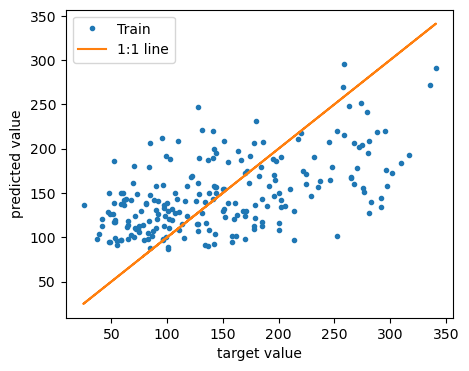

In [25]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_train, pipeline.predict(X_train.reshape(-1, 1)), '.', label = 'Train')
plt.plot(y_train, y_train, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

### Evaluation

In [26]:
# make predictions on testing dataset
y_pred = pipeline.predict(X_test.reshape(-1, 1))

In [27]:
# model performance on the training dataset
rmse_test = mean_squared_error(y_test, y_pred, squared = False)
r2_test = r2_score(y_test, y_pred)

print("RMSE test:", rmse_test)
print("R2 test:", r2_test)

RMSE test: 62.99195916065501
R2 test: 0.3597059052585816


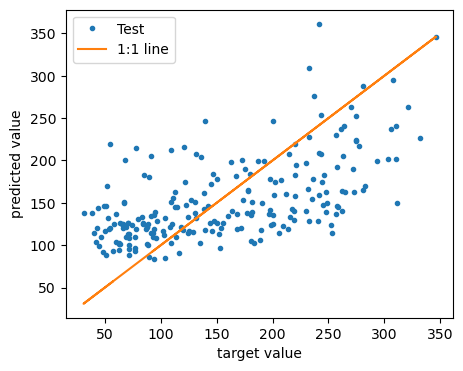

In [28]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.', label = 'Test')
plt.plot(y_test, y_test, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

## Part 4. Hands-on exercise

In this exercise, we will build a polynomial regression model with the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02.

You can find the description of this dataset [here](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

The goal of the regression model is to predict the median house value (MedHouseVal) for California districts, , expressed in hundreds of thousands of dollars ($100,000).

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Load the California Housing Dataset
- Split the dataset into the training and testing part
- Construct a pipeline as the polynomial regression model with all features
- Train and evaluate the model

In [29]:
# [TBC] complete your code here with proper comments
from sklearn.datasets import fetch_california_housing
feature_df, target_df  = fetch_california_housing(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
)


### Task 2. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [30]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.7, # 70% training & 30% testing
    shuffle = False # split dataset without shuffling
)

### Task 3. Construct a pipeline

<span style="color:red">**[TBC]**</span> Please construct a pipeline as the polynomial regression model (degree = 2). All available features in the dataset will be used as the input variables. There are two steps in this pipeline: `PolynomialFeatures` and `LinearRegression`.

In [31]:
X_train.shape

(14447, 8)

In [32]:
# define the pipeline
pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
        ('mlr', LinearRegression(fit_intercept = True))
    ]
)

In [33]:
# [TBC] complete your code here with proper comments
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('mlr', LinearRegression())])

In [34]:
# model performance on the training dataset
rmse_train = mean_squared_error(y_train, pipeline.predict(X_train), squared = False)
r2_train = r2_score(y_train, pipeline.predict(X_train))

print("RMSE train:", rmse_train)
print("R2 train:", r2_train)

RMSE train: 0.6237095067974695
R2 train: 0.6908975858870401


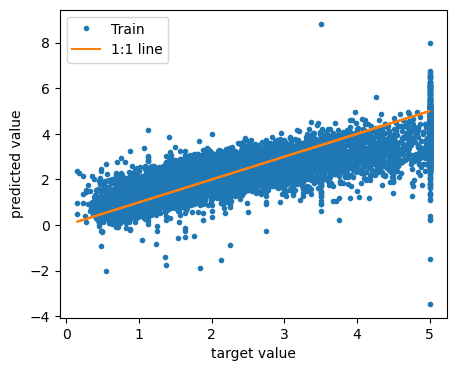

In [35]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_train, pipeline.predict(X_train), '.', label = 'Train')
plt.plot(y_train, y_train, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

<span style="color:red">**[TBC]**</span> Please explain the meaninng of the parameter `include_bias` of `PolynomialFeatures` and the relationship between this parameter and the parameter `fit_intercept` of `LinearRegression`.

<span style="color:red">**[TBC]**</span> Write your answer here.

include_bias parameter of PolynomialFeatures specifies whether to include a bias term (intercept) in the generated polynomial features. 
Relationship with fit_intercept in LinearRegression is that when you are using PolynomialFeatures with include_bias=True, it adds a bias column to the features, which represents the intercept term in the polynomial regression equation.


### Task 4. Train and evaluate the model

<span style="color:red">**[TBC]**</span>

Please fit the model to the training dataset, then evaluate the model with the testing dataset.

Please calculate the RMSE and R2 of model on both training and testing dataset.

Please visulaize the model's predictions on training and testing dataset.

RMSE train: 0.6237095067974695
R2 train: 0.6908975858870401


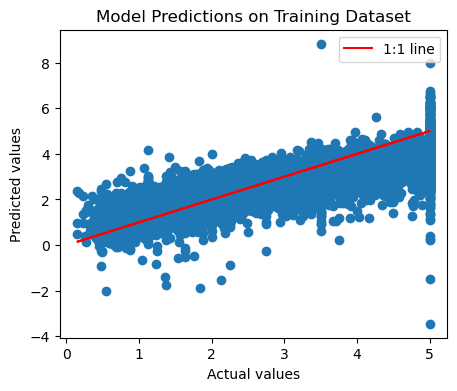

In [36]:
# Fit the model to the training dataset
pipeline.fit(X_train, y_train)

# Make predictions on the training dataset
y_train_pred = pipeline.predict(X_train)

# Model performance on the training dataset
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print("RMSE train:", rmse_train)
print("R2 train:", r2_train)

# Visualization for training dataset predictions
plt.figure(figsize=[5, 4])
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, color='red', label='1:1 line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Model Predictions on Training Dataset')
plt.legend()
plt.show()




RMSE test: 820476.2388076233
R2 test: -464782924301.1754


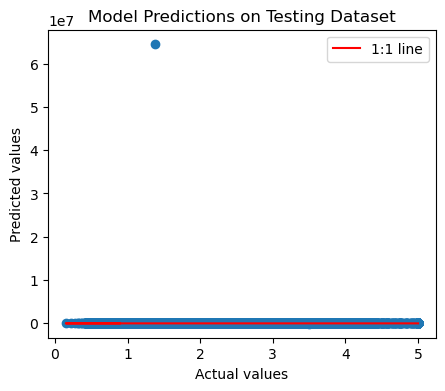

In [42]:
# Make predictions on the testing dataset
y_test_pred = pipeline.predict(X_test)

# Model performance on the testing dataset
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print("RMSE test:", rmse_test)
print("R2 test:", r2_test)

# Visualization for testing dataset predictions
plt.figure(figsize=[5, 4])
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='red', label='1:1 line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Model Predictions on Testing Dataset')
plt.legend()
plt.show()

### Challenge 1. Under-fitting & Over-fitting

Increasing the degree of polynomial will increase the complexity of polynomial regression model.

A polynomial regression model with higher degree will tend to over-fit the training dataset.

Please try to build polynomial regression models with different degrees (1, 2, 3, 4, 5, 6).

Please create a figure of line graph. The x-axis is the degree of the polynomial regression model. The y-axis is the RMSE of model on training / testing dataset.

Use this figure to analyze when model under-fits or over-fits the training dataset.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

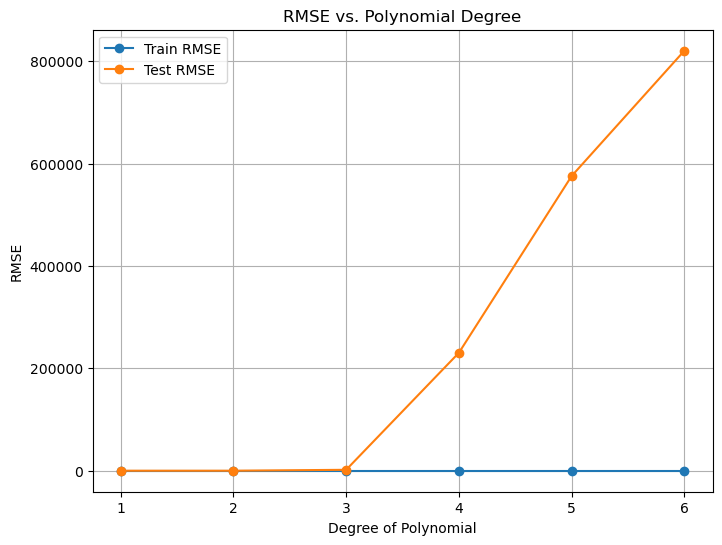

In [38]:

degrees = [1, 2, 3, 4, 5, 6]
train_errors = []
test_errors = []

for degree in degrees:
    # Create pipeline with polynomial features and linear regression
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('mlr', LinearRegression())
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Calculate RMSE for training and testing datasets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred, squared=False)
    test_error = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot RMSE values for different degrees
plt.figure(figsize=[8, 6])
plt.plot(degrees, train_errors, marker='o', label='Train RMSE')
plt.plot(degrees, test_errors, marker='o', label='Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('RMSE vs. Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


### Challenge 2. Embed feature selection into pipeline

We have 8 features in the original California Housing dataset

If the degree was set to 6, there will be 3002 terms in the polynomial, which means there are 3002 features in the resulting regression model.

To reduce the complexity of the resulting model, please embed feature selection into the pipeline (between `PolynomialFeatures` and `LinearRegression`) to force there will be only 8 features selected in the final model. Use `sklearn.feature_selection.f_regression` as the score function of `SelectKBest`.

Please try to build polynomial regression models with different degrees (1, 2, 3, 4, 5, 6) using this new pipeline to see if the over-fitting is restrained.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

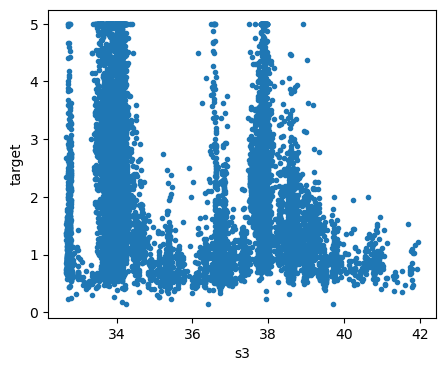

In [39]:
# [TBC] complete your code here with proper comments
# Use r_regression
selector_r = SelectKBest(
    score_func = r_regression, # specify Pearson correlation coefficient as the score function
    k = 8 # select the 8 best features
)
selector_r.fit(X_train, y_train) # use the training dataset instead of the entire dataset

# formalize the selection result as a DataFrame
result_r = pd.DataFrame(
    {
        'feature': feature_df.columns.values, # feature names
        'score': selector_r.scores_, # scores for each feature
        'selected': selector_r.get_support() # selected or not
    }
)
result_r

# scatter plot between s3 and target
plt.figure(figsize = [5, 4])
plt.plot(X_train[:,6], y_train, '.')
plt.xlabel('s3')
plt.ylabel('target')
plt.show()

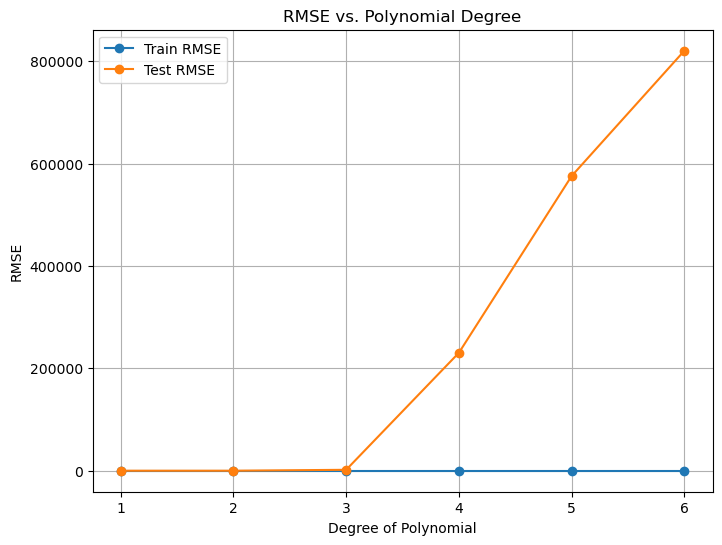

In [40]:
degrees = [1, 2, 3, 4, 5, 6]
train_errors = []
test_errors = []

for degree in degrees:
    # Create pipeline with polynomial features and linear regression
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('mlr', LinearRegression())
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Calculate RMSE for training and testing datasets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred, squared=False)
    test_error = mean_squared_error(y_test, y_test_pred, squared=False)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot RMSE values for different degrees
plt.figure(figsize=[8, 6])
plt.plot(degrees, train_errors, marker='o', label='Train RMSE')
plt.plot(degrees, test_errors, marker='o', label='Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('RMSE vs. Polynomial Degree')
plt.legend()
plt.grid()
plt.show()